Accuracy: 0.8388888888888889


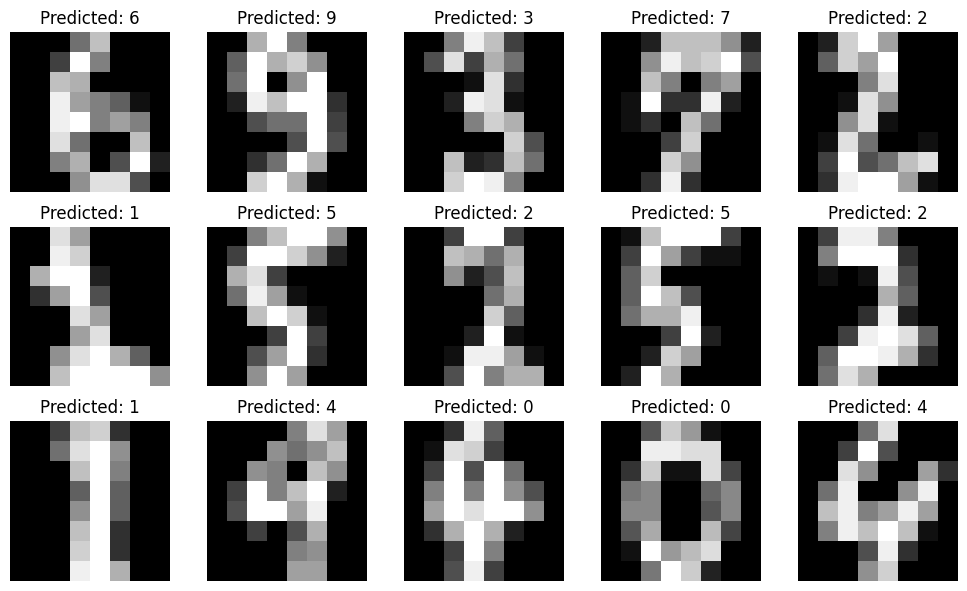

In [1]:
from skimage.feature import hog
from skimage import exposure
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load dataset (contoh menggunakan dataset digit dari scikit-learn)
digits = load_digits()

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

# Ekstraksi fitur menggunakan HOG
hog_features_train = []
for img in X_train:
    fd = hog(img.reshape((8, 8)), orientations=9, pixels_per_cell=(4, 4), cells_per_block=(1, 1), visualize=False)
    hog_features_train.append(fd)

hog_features_test = []
for img in X_test:
    fd = hog(img.reshape((8, 8)), orientations=9, pixels_per_cell=(4, 4), cells_per_block=(1, 1), visualize=False)
    hog_features_test.append(fd)

# Membuat model SVM
svm_model = SVC(kernel='linear')

# Melatih model SVM
svm_model.fit(hog_features_train, y_train)

# Memprediksi kelas dari data uji
predictions = svm_model.predict(hog_features_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Visualisasi beberapa contoh prediksi
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[i].reshape((8, 8)), cmap='gray')
    ax.set_title(f"Predicted: {predictions[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()
